# Descriptive Analysis - Simple EDA / Initial Data Exploration

In [9]:
# import required libraries and data
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("tips.csv")

## Initial Inspection
Check the data initially for its size and count and nullability. This is to get an initial familiarity with the data.

In [10]:
# check the shape of the data to get the number of rows and columns are present
df.shape

(244, 7)

In [21]:
# first update any blank strings with nan so it is caught as a null value
df = df.replace("", np.nan)
# use .info() to get an idea of the data types for each column and how many non null values there are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
# Preview first rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# how many different dining times are logged
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [20]:
# find the number of distinct party sizes
df["size"].unique()

array([2, 3, 4, 1, 6, 5])

In [23]:
# view basic stats for numercial columns
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


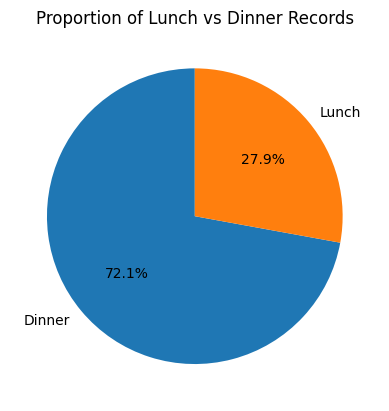

In [27]:
# visaluse dining proportions
# Count of rows by meal time
counts = df['time'].value_counts()

# Pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Lunch vs Dinner Records")
plt.show()


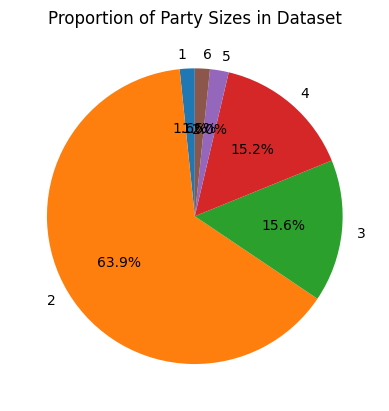

In [26]:
# visualise by party size
# Count of rows by party size
counts = df['size'].value_counts().sort_index()

# Pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Party Sizes in Dataset")
plt.show()


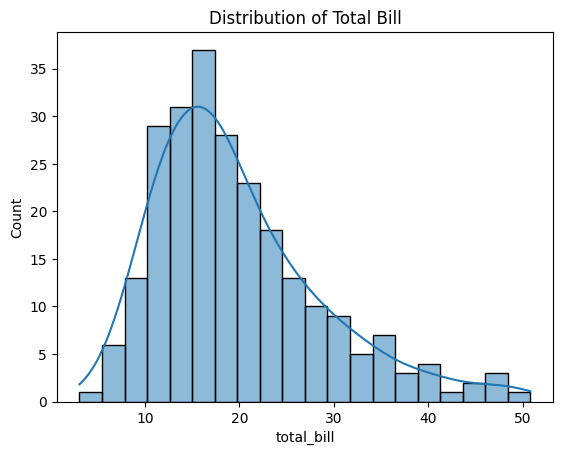

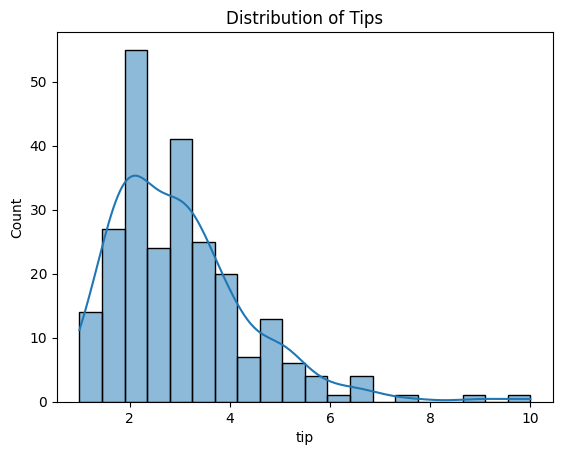

In [29]:
# check the distribution of total bills and tips
sns.histplot(df['total_bill'], bins=20, kde=True)
plt.title("Distribution of Total Bill")
plt.show()

sns.histplot(df['tip'], bins=20, kde=True)
plt.title("Distribution of Tips")
plt.show()


## Distribution Analysis  

The distributions of both **total bill** and **tip** are **right-skewed** (positively skewed), with most values concentrated at the lower end and a long tail of larger amounts.  

**Total Bill**  
- Most bills fall between **$10–$25**, with only a few reaching as high as **$50**.  
- The distribution is fairly smooth, showing a natural spread of spending behavior.  
- Outliers (large spenders) are present and pull the mean upward.  

**Tips**  
- Most tips are clustered between **$2–$4**, with a few reaching up to **$10**.  
- The distribution is more irregular (“lumpier”) than total bills, likely due to **rounding habits** (e.g., many customers tipping exactly $2, $3, or $5).  
- Larger tips are rare and should be considered outliers.  

**Key Insight**  
- Because of the skew and outliers, the **median** is a better measure of central tendency than the mean for describing *typical* bills and tips.  
  - Example: the mean bill is ~$19.8, but most customers actually spend less (median ~$17.9).  
  - Example: the mean tip is ~$3.0, but tips cluster more tightly around the median of $3.0.  
- This highlights that reporting the **median + IQR** gives a truer picture of customer behavior than mean + standard deviation.  

**Next Step**  
To remove the dependency of tips on bill size, we will examine the distribution of **tip percentage** (`tip ÷ total_bill × 100`). This will allow for fairer comparisons across different party sizes and meal times.  
